# Contract Data from opendata.delaware.gov

Testing with pandas datasets

In [1]:
# import libraries
import pandas as pd                   # Dataframe analysis library
import numpy as np                    # Numberic calculation library 
import matplotlib.pyplot as plt       # Plot lib for graphing 
from matplotlib.pyplot import figure  # shortcut to 'figure' object

In [2]:
# Set the output for float numbers to display with commas and two decimals
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
# connect to data source
data = pd.read_csv("Statewide_Central_Contract_Spend.csv")

In [4]:
# show first five records
data.head()

,Agency,Short Contract Number,Contract Description,Vendor Name,Total Spend,Month of Spend,Spend Group,Calendar Year,Calendar Month,FY,Long Contract Number
0,GSA,002 (GSA),Dormitory Furniture,"J Squared, Inc.","123,991.20",01/01/2014 12:00:00 AM,A,2014,1,2014,GSA13002-DORMFURN
1,GSA,002 (GSA),Dormitory Furniture,"J Squared, Inc.","130,889.34",06/01/2014 12:00:00 AM,A,2014,6,2014,GSA13002-DORMFURN
2,GSA,002 (GSA),Dormitory Furniture,"J Squared, Inc.",440.60,01/01/2017 12:00:00 AM,S,2017,1,2017,GSA13002-DORMFURN
3,GSA,003 (GSA),Customer Relationship Management System,Carahsoft Technology Corporation,"494,165.00",02/01/2013 12:00:00 AM,A,2013,2,2013,GSA12003-CRM_SOFTWARE
4,GSA,003 (GSA),Customer Relationship Management System,Carahsoft Technology Corporation,"30,240.00",02/01/2014 12:00:00 AM,A,2014,2,2014,GSA12003-CRM_SOFTWARE


In [5]:
# Random 5 records
data.sample(5)

,Agency,Short Contract Number,Contract Description,Vendor Name,Total Spend,Month of Spend,Spend Group,Calendar Year,Calendar Month,FY,Long Contract Number
35216,GSS,787,Paper - Copy and Specialty,Staples,"6,935.59",08/01/2017 12:00:00 AM,A,2017,8,2018,GSS17787-PAPER-COPY/SPC
20274,GSS,551,Janitorial Services,DELARF,"339,294.14",06/01/2017 12:00:00 AM,A,2017,6,2017,GSS10551
35071,GSS,780,Ultra Low Sulfur Heating Oil,CARL KING ENERGY DIV OF GRIFFITH ENERGY,"3,659.98",02/01/2018 12:00:00 AM,M,2018,2,2018,GSS16780-ULSHEATOIL
7964,GSS,356,Pre-Sort Mail Service,Print and Mail Communications,750.82,09/01/2015 12:00:00 AM,M,2015,9,2016,GSS15356A-PRESORT_MAIL
24774,GSS,602,Interpretation (On-Site) & Translation (Writte...,Para-Plus Translations,"2,050.90",12/01/2014 12:00:00 AM,M,2014,12,2015,GSS14602-TRANSLAT_OSW


In [6]:
# Count rows and columns
data.shape

(36735, 11)

In [7]:
# show dataframe structure
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36735 entries, 0 to 36734
Data columns (total 11 columns):
Agency                   36735 non-null object
Short Contract Number    36735 non-null object
Contract Description     36735 non-null object
Vendor Name              36735 non-null object
Total Spend              36735 non-null float64
Month of Spend           36735 non-null object
Spend Group              36735 non-null object
Calendar Year            36735 non-null int64
Calendar Month           36735 non-null int64
FY                       36735 non-null int64
Long Contract Number     36735 non-null object
dtypes: float64(1), int64(3), object(7)
memory usage: 3.1+ MB


In [8]:
# Remove the spaces in column names
data.columns = data.columns.str.replace(' ', '')

In [9]:
# After removing spaces from column names 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36735 entries, 0 to 36734
Data columns (total 11 columns):
Agency                 36735 non-null object
ShortContractNumber    36735 non-null object
ContractDescription    36735 non-null object
VendorName             36735 non-null object
TotalSpend             36735 non-null float64
MonthofSpend           36735 non-null object
SpendGroup             36735 non-null object
CalendarYear           36735 non-null int64
CalendarMonth          36735 non-null int64
FY                     36735 non-null int64
LongContractNumber     36735 non-null object
dtypes: float64(1), int64(3), object(7)
memory usage: 3.1+ MB


In [10]:
# Add column for FY month number
data['FYMonth']=0
data.loc[data['CalendarMonth'] >= 7, 'FYMonth'] = data['CalendarMonth']
data.loc[data['CalendarMonth'] < 7, 'FYMonth'] = data['CalendarMonth']+12
data['FYMonth'] = data['FYMonth']-6


In [11]:
# Describe data for FY19 TotalSpend
# min and max are kind of odd outliers
s0=data[data['FY']==2019]
s0['TotalSpend'].describe()

count       4,970.00
mean       50,303.15
std       195,066.40
min      -260,026.12
25%         1,500.00
50%         6,994.55
75%        28,972.80
max     5,339,460.60
Name: TotalSpend, dtype: float64

In [12]:
# Sort FY19 spend from high to low
s0=s0.sort_values('TotalSpend', ascending=False)

In [13]:
# First record (highest)
s0.head(1)

,Agency,ShortContractNumber,ContractDescription,VendorName,TotalSpend,MonthofSpend,SpendGroup,CalendarYear,CalendarMonth,FY,LongContractNumber,FYMonth
35624,GSS,809,Elections System Solution,"Election Systems & Software, LLC","5,339,460.60",02/01/2019 12:00:00 AM,A,2019,2,2019,GSS18809-ELECTION_SYS,8


In [14]:
# Last record (lowest)
s0.tail(1)

,Agency,ShortContractNumber,ContractDescription,VendorName,TotalSpend,MonthofSpend,SpendGroup,CalendarYear,CalendarMonth,FY,LongContractNumber,FYMonth
27299,GSS,642,Software Value-Added Reseller,SHI International Corp,"-260,026.12",05/01/2019 12:00:00 AM,A,2019,5,2019,GSS16642-SOFTWAREVAR,11


In [15]:
# All unique contract descriptions
print('contract count = ' + str(len(data.ContractDescription.unique()))+"\n")
c0 = data['ContractDescription'].unique()
print(sorted(c0))

contract count = 365

['2017 Vans and SUVs', 'AG Tractors', 'ALUMINUM BOAT', 'ARMORED VEHICLES', 'Aircraft Maintenance and Repair', 'All Hazards Exercise Program', 'Aluminum Floating Docks', 'Ammunition', 'Ammunition and Targets', 'Apparel Blanks (DCI)', 'Aquatic Acoustic Telemetry', 'Aquatic Herbicide', 'Aquatic Herbicides', 'Armored Car Services', 'Armored Multi-Terrain Loader', 'Armored Vehicles', 'Art and Instructional School Supplies', 'Auctioneer Services', "Auctioneer's Services", 'Audio Visual Equipment & Audio Visual Web Conferencing', 'Audio, Video & Surveillance Equipment and Services', 'Auto Parts and Batteries', 'Automated Recruitment and Selection System', 'Band Uniforms', 'Biodiesel - B20 Fuel and B5 Fuels', 'Biodiesel - B20 and B5 Fuels', 'Body Armor', 'Bottled Water', 'Bottled Water and Cooler Rental', 'Bread and Bread Products', 'Building Access Security Services', 'Building Automation Services - BAS', 'Business Cards', 'Business Cards and Envelopes', 'CDL Drug and Al

In [16]:
# Query a contract description
data[data['ContractDescription'].str.contains('ARMORED VEHICLES')]

,Agency,ShortContractNumber,ContractDescription,VendorName,TotalSpend,MonthofSpend,SpendGroup,CalendarYear,CalendarMonth,FY,LongContractNumber,FYMonth
212,GSA,044 (GSA),ARMORED VEHICLES,"LENCO INDUSTRIES, INC.","278,973.00",05/01/2017 12:00:00 AM,A,2017,5,2017,GSA16044-ARMOR_VEH,11
213,GSA,044 (GSA),ARMORED VEHICLES,"LENCO INDUSTRIES, INC.","2,030.00",09/01/2017 12:00:00 AM,A,2017,9,2018,GSA16044-ARMOR_VEH,3


In [17]:
# Query any contract description that contains the word 'helicopter'
data[data['ContractDescription'].str.contains('(?i)helicopter')]

,Agency,ShortContractNumber,ContractDescription,VendorName,TotalSpend,MonthofSpend,SpendGroup,CalendarYear,CalendarMonth,FY,LongContractNumber,FYMonth
35704,GSS,828,Light Twin-Engine Helicopters,Bell Helicopter Textron Inc.,"885,010.50",12/01/2018 12:00:00 AM,A,2018,12,2019,GSS18828-HELICOPTER,6


In [18]:
#Total by Fiscal Year (all SpendGroups)
s1 = data.groupby(['FY'])['TotalSpend'].sum().reset_index()
s1 = s1.sort_values('FY', ascending=False)
s1

,FY,TotalSpend
6,2019,"250,006,675.45"
5,2018,"253,070,820.13"
4,2017,"234,776,797.83"
3,2016,"255,645,332.43"
2,2015,"224,876,186.50"
1,2014,"232,988,508.41"
0,2013,"236,044,950.16"


In [19]:
#Total by Fiscal Year for SpendGroup A(Agency)
s2 = data[data['SpendGroup']=='A']
s2 = s2.groupby(['FY','SpendGroup'])['TotalSpend'].sum().reset_index()
s2 = s2.sort_values(['FY'], ascending=False)
print("Agency Contract Spending")
s2

Agency Contract Spending


,FY,SpendGroup,TotalSpend
6,2019,A,"189,628,240.43"
5,2018,A,"188,717,620.02"
4,2017,A,"171,115,523.53"
3,2016,A,"198,002,868.62"
2,2015,A,"167,795,290.64"
1,2014,A,"175,469,729.30"
0,2013,A,"163,054,405.56"


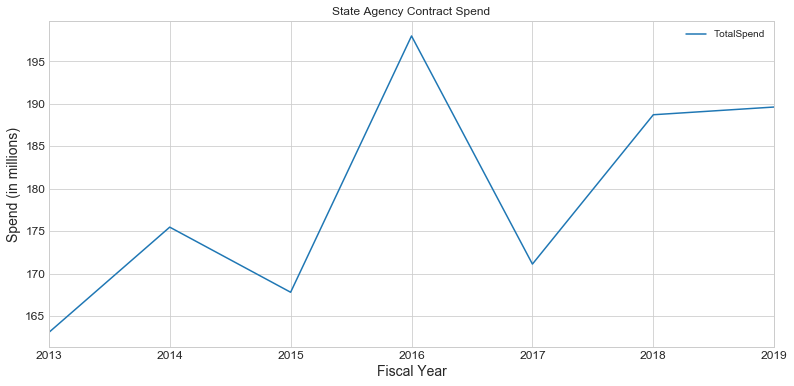

In [20]:
# FY2019 is not yet completed.  Remove from dataframe and graph
s2 = s2.sort_values(['FY'], ascending=True)
s2['TotalSpend']=s2['TotalSpend']/1000000
s2 = s2[s2['FY'] < 2020]
plt.style.use('seaborn-whitegrid')
ax = s2.plot(kind='Line', x='FY', y='TotalSpend', title ="State Agency Contract Spend", figsize=(13, 6), legend=True, fontsize=12)
ax.set_xlabel("Fiscal Year", fontsize=14)
ax.set_ylabel("Spend (in millions)", fontsize=14)
plt.show()

In [21]:
#Total by Fiscal Year for SpendGroup S(School)
s2 = data[data['SpendGroup']=='S']
s2 = s2.groupby(['FY','SpendGroup'])['TotalSpend'].sum().reset_index()
s2 = s2.sort_values(['FY'], ascending=False)
print("School Contract Spending")
s2

School Contract Spending


,FY,SpendGroup,TotalSpend
6,2019,S,"35,474,696.57"
5,2018,S,"41,934,499.03"
4,2017,S,"39,804,827.29"
3,2016,S,"35,891,166.58"
2,2015,S,"36,528,825.53"
1,2014,S,"36,500,904.15"
0,2013,S,"50,747,476.25"


In [22]:
#top 15 vendors for FY19
s3 = data[data['SpendGroup']=='A']
s3 = s3[s3['FY']==2019]
s3 = s3.groupby(['VendorName'])['TotalSpend'].sum().reset_index()
s3 = s3.sort_values('TotalSpend', ascending=False)
s3.head(15)

,VendorName,TotalSpend
121,"Computer Aid, Inc","13,293,718.01"
446,SHI International Corp,"12,838,461.74"
191,"Election Systems & Software, LLC","9,302,234.00"
250,Goodwill of Delaware and Delaware County,"8,364,730.90"
12,ALOYSIUS BUTLER & CLARK,"6,426,508.24"
147,DELL MARKETING LP,"6,035,232.86"
259,HERTRICH FLEET SERVICES INC,"4,120,430.26"
143,DELARF,"4,036,588.85"
101,Canon Financial Services Inc,"3,813,643.45"
536,Verizon Delaware LLC,"3,530,984.00"


In [29]:
#top 15 contract spend for FY19
s3 = data[data['SpendGroup']=='A']
s3 = s3[s3['FY']==2019]
s3 = s3.groupby(['LongContractNumber','ContractDescription'])['TotalSpend'].sum().reset_index()
s3 = s3.sort_values('TotalSpend', ascending=False)
print("Top 25 - Contract Spend for FY19")
s3.head(25)

Top 25 - Contract Spend for FY19


,LongContractNumber,ContractDescription,TotalSpend
91,GSS16112-TEMP_EMPL,Temporary Employment Services,"18,790,187.32"
110,GSS16642-SOFTWAREVAR,Software Value-Added Reseller,"13,340,496.23"
63,GSS15597-IT_SERVICES,Information Technology Staff Augmentation Serv...,"13,293,718.01"
55,GSS15133-COMPUTER,Computer Equipment Peripherals & Related Services,"11,653,646.86"
35,GSS14638-MARKET_ADV,"Marketing Public Relations Svcs, Advertising a...","10,961,044.26"
201,GSS18809-ELECTION_SYS,Elections System Solution,"9,302,234.00"
94,GSS16157A-FUEL_MGMT,Fuel Management,"5,928,464.50"
158,GSS17728-FOOD_PROD,Food Products and Services,"5,180,464.14"
143,GSS17560-TRUCKS_VANS,Trucks and Vans – Model Year 2018 or Later,"4,572,930.60"
123,GSS17013-POLICEVEH,Police Pursuit Vehicles - Model Year 2018 or L...,"4,133,818.72"


In [24]:
contract = 'GSS15133-COMPUTER'
fy = 2019
s4=data[data['FY']==fy]
s4=s4[s4['LongContractNumber']==contract]
s4=s4.groupby(['LongContractNumber','SpendGroup','FY','FYMonth'])['TotalSpend'].sum().reset_index()
s4[s4['SpendGroup']=='A'] # Show monthly spend for state agencies

,LongContractNumber,SpendGroup,FY,FYMonth,TotalSpend
0,GSS15133-COMPUTER,A,2019,1,"3,944,029.06"
1,GSS15133-COMPUTER,A,2019,3,"9,937.20"
2,GSS15133-COMPUTER,A,2019,4,"4,033,005.71"
3,GSS15133-COMPUTER,A,2019,7,"3,294,572.60"
4,GSS15133-COMPUTER,A,2019,10,"356,337.97"
5,GSS15133-COMPUTER,A,2019,11,"15,764.32"


In [25]:
p=s4.pivot(index='SpendGroup',columns='FYMonth', values='TotalSpend')
p=p.fillna(0)   #fill NaN with 0
p

FYMonth,1,3,4,7,10,11
SpendGroup,,,,,,
A,"3,944,029.06","9,937.20","4,033,005.71","3,294,572.60","356,337.97","15,764.32"
M,"453,634.31",0.00,"130,758.80","410,320.32",0.00,0.00
S,"2,888,088.35",0.00,"1,872,965.56","1,424,441.45",0.00,0.00


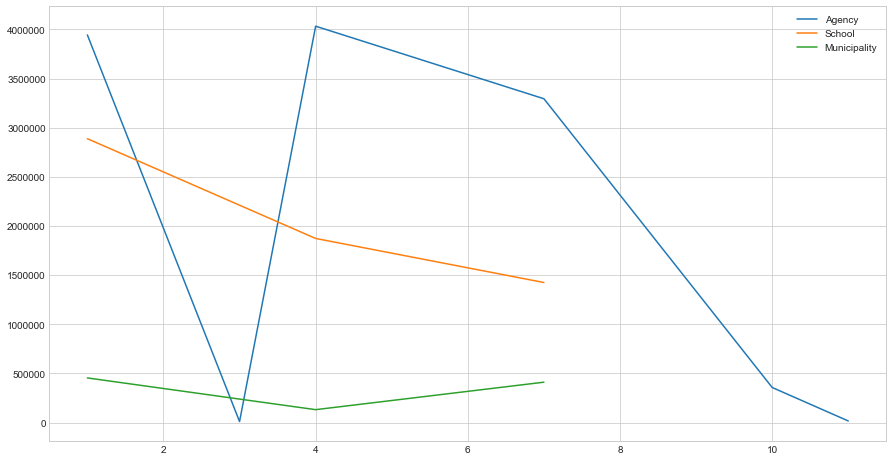

In [26]:
# Plot line chart for FY19 by spend groups
plt.figure(figsize = (15, 8))
plt.style.use('seaborn-whitegrid')
sgs=['A','S','M']
for sg in sgs:
    pl=s4[s4['SpendGroup']==sg]
    plt.plot(pl['FYMonth'], pl['TotalSpend'])
plt.legend(['Agency','School','Municipality'])


In [28]:
# FY19 most used contracts for state agencies by spend counts
s5=data[data['FY']==2019]
s5=s5[s5['SpendGroup']=='A']
s5=s5.groupby(['ContractDescription','LongContractNumber'])['TotalSpend'].count()
s5.sort_values()
s5=pd.DataFrame(s5)
s5 = s5.sort_values('TotalSpend', ascending=False)
s5.rename(columns={'TotalSpend':'SpendCount'},inplace=True)
s5.head(25) # Show top 25

,,SpendCount
ContractDescription,LongContractNumber,
Heavy Duty Vehicle Parts & Accessories,GSS16652-HVY_EQP_PART,169
Fleet Maintenance and Repair,GSS16526-MAIN_REPAI,168
Temporary Employment Services,GSS16112-TEMP_EMPL,98
Clothing Footwear & Scrubs,GSS15070-CLOTHING,78
Collision Repair Services,GSS17498-REPAIR_SVCS,68
Furniture,GSS16479-FURNITURE,63
Auto Parts and Batteries,GSS15007-AUTO_PARTS,62
"Marketing Public Relations Svcs, Advertising and Media Buying",GSS14638-MARKET_ADV,59
Towing Services,GSS14053-TOWING,49
